In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [2]:
PATH_TO_RESULTS = '/home/lgierz/BA_MothClassification/data/processed/results/'

In [3]:

DATASET_CONFIGS = {
    'top277': (277, [3000, 2000, 1000, 500]),
    'top387': (387, [2000, 1000, 500]),
    'top589': (589, [1000, 500])
}

In [4]:
import os

# Initialize an empty list to store dataframes
dfs = []

# Iterate over the foundational models
for fm in ['dino', 'resnet']:
    # Iterate over the dataset configurations
    for config_name, (species_amount, sample_amounts) in DATASET_CONFIGS.items():
        # Iterate over the sample amounts
        for sample_amount in sample_amounts:
            # Construct the file name
            file_name = f"{fm}_cv_test_top{species_amount}_max{sample_amount}.csv"
            file_path = os.path.join(PATH_TO_RESULTS, file_name)
            
            # Load the CSV file
            df = pd.read_csv(file_path)
            
            # Add the new columns
            df['FoundationalModel'] = 'DINOv2' if fm == 'dino' else 'ResNet50'
            df['SpeciesAmount'] = species_amount
            df['SampleAmount'] = sample_amount
            
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all dataframes into one
result_df = pd.concat(dfs, ignore_index=True)


### Highest Accuracies for Foundational-Model-Dataset Combinations

In [18]:
# Compute the mean accuracy, precision, recall, and F1-score grouped by SpeciesAmount and SampleAmount
avg_metrics = result_df.groupby(["FoundationalModel", "Model", "SpeciesAmount", "SampleAmount"])[["Accuracy"]].max()
avg_metrics

Accuracy
FoundationalModel Model             SpeciesAmount SampleAmount          
DINOv2            KNN               277           500             0.6758
                                                  1000            0.7094
                                                  2000            0.7387
                                                  3000            0.7542
                                    387           500             0.6487
                                                  1000            0.6853
                                                  2000            0.7155
                                    589           500             0.6226
                                                  1000            0.6612
                  Linear Classifier 277           500             0.8970
                                                  1000            0.9127
                                                  2000            0.9247
                                                  3000            0.9305
                                    387           500             0.8830
                                                  1000            0.9012
                                                  2000            0.9153
                                    589           500             0.8723
                                                  1000            0.8912
ResNet50          KNN               277           500             0.3792
                                                  1000            0.4143
                                                  2000            0.4477
                                                  3000            0.4660
                                    387           500             0.3462
                                                  1000            0.3803
                                                  2000            0.4144
                                    589           500             0.3107
                                                  1000            0.3447
                  Linear Classifier 277           500             0.6444
                                                  1000            0.6811
                                                  2000            0.7056
                                                  3000            0.7160
                                    387           500             0.6163
                                                  1000            0.6528
                                                  2000            0.6793
                                    589           500             0.5866
                                                  1000            0.6232

### Tabels of Averages across Datasets
- Linear combination: LR 0.001, Epochs 1500
- KNN Neighbors: 35

In [6]:
avg_metrics = result_df[(result_df['FoundationalModel'] == 'DINOv2') & (result_df['Model'] == 'Linear Classifier')].groupby(['FoundationalModel', 'Model', 'Learning Rate', 'Epochs'])[["Accuracy", "Precision", "Recall", "F1-Score"]].mean().sort_values(by='Accuracy', ascending=False)
avg_metrics

Accuracy  Precision  \
FoundationalModel Model             Learning Rate Epochs                        
DINOv2            Linear Classifier 0.0005        1500.0  0.902700   0.904433   
                                    0.0010        1000.0  0.902489   0.904311   
                                    0.0005        2000.0  0.902178   0.904000   
                                                  1000.0  0.901644   0.903278   
                                    0.0010        1500.0  0.901100   0.903078   
                                                  2000.0  0.899444   0.901567   
                                    0.0050        1000.0  0.895044   0.897589   
                                                  1500.0  0.892033   0.894878   
                                                  2000.0  0.889611   0.892678   

                                                            Recall  F1-Score  
FoundationalModel Model             Learning Rate Epochs                      
DINOv2            Linear Classifier 0.0005        1500.0  0.902700  0.903022  
                                    0.0010        1000.0  0.902489  0.902878  
                                    0.0005        2000.0  0.902178  0.902533  
                                                  1000.0  0.901644  0.901911  
                                    0.0010        1500.0  0.901100  0.901556  
                                                  2000.0  0.899444  0.899933  
                                    0.0050        1000.0  0.895044  0.895711  
                                                  1500.0  0.892033  0.892811  
                                                  2000.0  0.889611  0.890489

In [7]:
avg_metrics = result_df[(result_df['FoundationalModel'] == 'DINOv2') & (result_df['Model'] == 'KNN')].groupby(['FoundationalModel', 'Model', 'Neighbors'])[["Accuracy", "Precision", "Recall", "F1-Score"]].mean().sort_values(by='Accuracy', ascending=False)
avg_metrics

Accuracy  Precision    Recall  F1-Score
FoundationalModel Model Neighbors                                         
DINOv2            KNN   35.0       0.690156   0.701900  0.690156  0.689611
                        50.0       0.686144   0.698911  0.686144  0.685322
                        65.0       0.681933   0.695778  0.681933  0.681000

In [8]:
avg_metrics = result_df[(result_df['FoundationalModel'] == 'ResNet50') & (result_df['Model'] == 'Linear Classifier')].groupby(['FoundationalModel', 'Model', 'Learning Rate', 'Epochs'])[["Accuracy", "Precision", "Recall", "F1-Score"]].mean().sort_values(by='Accuracy', ascending=False)
avg_metrics

Accuracy  Precision  \
FoundationalModel Model             Learning Rate Epochs                        
ResNet50          Linear Classifier 0.0010        2000.0  0.654144   0.654767   
                                                  1500.0  0.652667   0.653400   
                                    0.0050        1000.0  0.650411   0.650733   
                                    0.0005        2000.0  0.648011   0.648700   
                                    0.0010        1000.0  0.646744   0.647500   
                                    0.0050        1500.0  0.646622   0.646644   
                                                  2000.0  0.643633   0.643378   
                                    0.0005        1500.0  0.640578   0.641300   
                                                  1000.0  0.624256   0.625178   

                                                            Recall  F1-Score  
FoundationalModel Model             Learning Rate Epochs                      
ResNet50          Linear Classifier 0.0010        2000.0  0.654144  0.653067  
                                                  1500.0  0.652667  0.651556  
                                    0.0050        1000.0  0.650411  0.649278  
                                    0.0005        2000.0  0.648011  0.646744  
                                    0.0010        1000.0  0.646744  0.645467  
                                    0.0050        1500.0  0.646622  0.645344  
                                                  2000.0  0.643633  0.642211  
                                    0.0005        1500.0  0.640578  0.639089  
                                                  1000.0  0.624256  0.622467

In [9]:
avg_metrics = result_df[(result_df['FoundationalModel'] == 'ResNet50') & (result_df['Model'] == 'KNN')].groupby(['FoundationalModel', 'Model', 'Neighbors'])[["Accuracy", "Precision", "Recall", "F1-Score"]].mean().sort_values(by='Accuracy', ascending=False)
avg_metrics

Accuracy  Precision    Recall  F1-Score
FoundationalModel Model Neighbors                                         
ResNet50          KNN   35.0       0.389200   0.407800  0.389200  0.384222
                        50.0       0.387856   0.407644  0.387856  0.382100
                        65.0       0.385533   0.407000  0.385533  0.379278

### Table of highest Averages across all test results

In [22]:
# result_df.to_csv(os.path.join(PATH_TO_RESULTS, 'all_results.csv'), index=False)
print(result_df.shape)
result_df[['SpeciesAmount', 'SampleAmount', 'FoundationalModel', 'Model', 'Accuracy', 'Neighbors', 'Learning Rate', 'Epochs']].sort_values(by='Accuracy', ascending=False).head(20).reset_index(drop=True)

(216, 15)


,SpeciesAmount,SampleAmount,FoundationalModel,Model,Accuracy,Neighbors,Learning Rate,Epochs
0,277,3000,DINOv2,Linear Classifier,0.9305,NaN,0.0010,1500.0
1,277,3000,DINOv2,Linear Classifier,0.9302,NaN,0.0010,2000.0
2,277,3000,DINOv2,Linear Classifier,0.9302,NaN,0.0005,2000.0
3,277,3000,DINOv2,Linear Classifier,0.9301,NaN,0.0010,1000.0
4,277,3000,DINOv2,Linear Classifier,0.9293,NaN,0.0005,1500.0
5,277,3000,DINOv2,Linear Classifier,0.9277,NaN,0.0050,1000.0
6,277,3000,DINOv2,Linear Classifier,0.9261,NaN,0.0005,1000.0
7,277,3000,DINOv2,Linear Classifier,0.9257,NaN,0.0050,1500.0
8,277,2000,DINOv2,Linear Classifier,0.9247,NaN,0.0005,2000.0
9,277,2000,DINOv2,Linear Classifier,0.9246,NaN,0.0010,1000.0


In [12]:
# Filter the dataframe for KNN and Linear Classifier
knn_df = result_df[result_df['Model'] == 'KNN'].reset_index()
linear_df = result_df[result_df['Model'] == 'Linear Classifier'].reset_index()


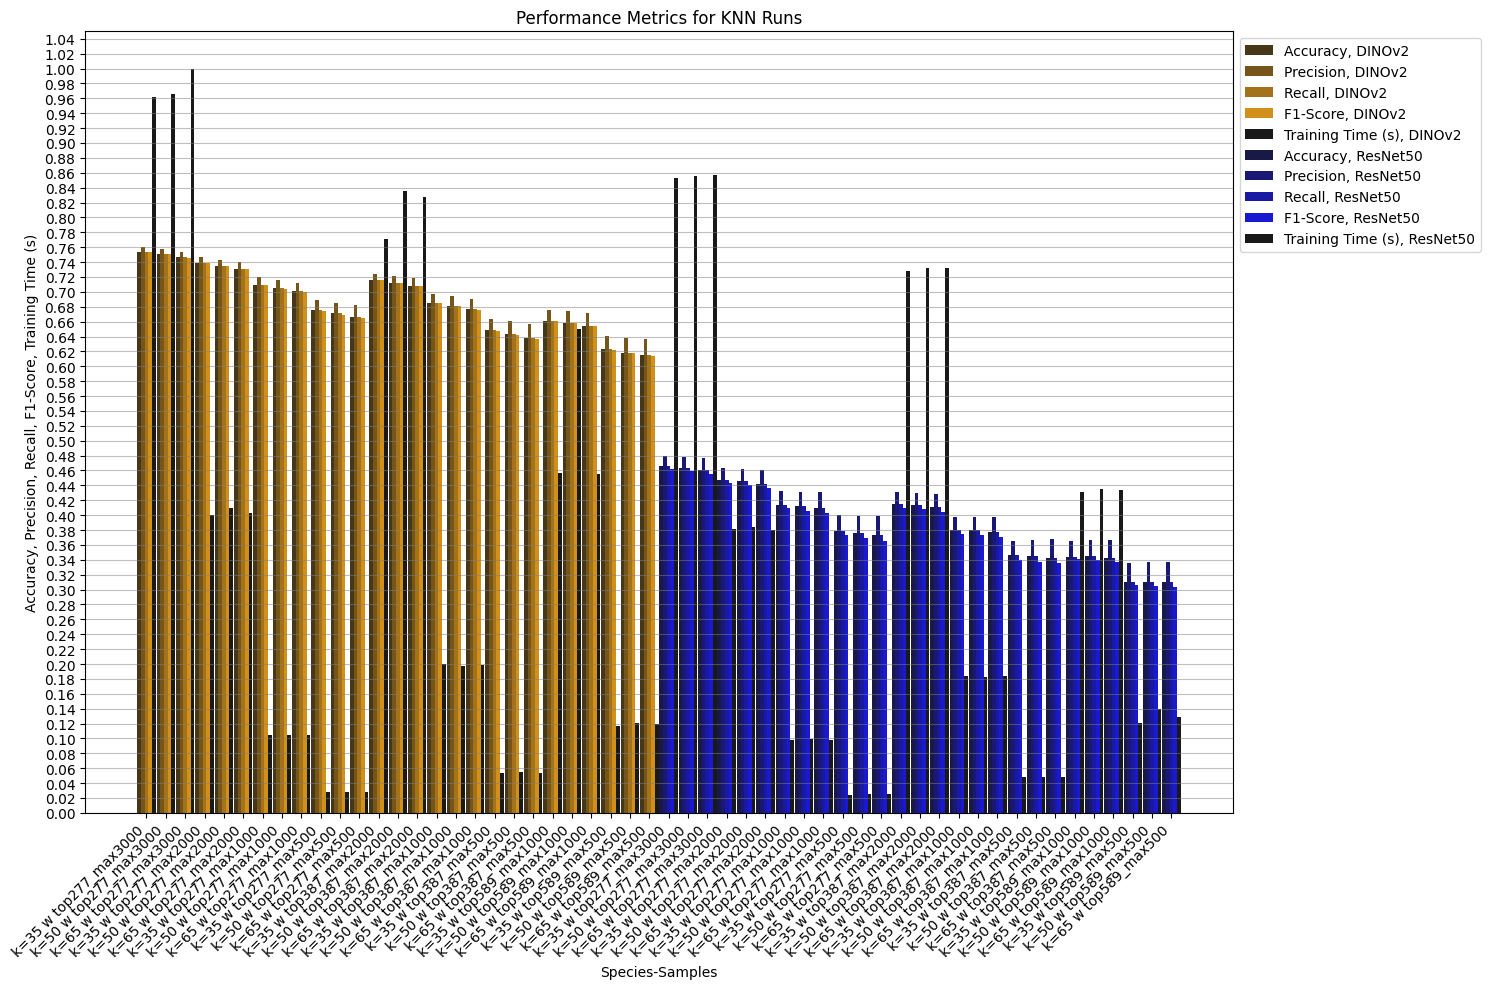

In [13]:
import matplotlib.colors as mcolors

def adjust_color_brightness(color, factor): 
    c = mcolors.to_rgb(color) 
    return (c[0] * factor, c[1] * factor, c[2] * factor)

# Colors for foundational models
colors = {
    'DINOv2': 'orange',
    'ResNet50': 'blue'
}

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

bar_width = 0.19
index = np.arange(len(knn_df))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time (s)']
bar_positions = {
    'Accuracy': 0,
    'Precision': 1,
    'Recall': 2,
    'F1-Score': 3,
    'Training Time (s)': 4
}

highest_training_duration = max(knn_df['Training Time (s)'])

added_labels = set()

# Draw bars
for i, row in knn_df.iterrows():
    basecolor = colors[row['FoundationalModel']]
    
    for metric in metrics:
        label_text = f'{metric}, {row["FoundationalModel"]}'
        
        # Add label only if it hasn't been added before
        label = label_text if label_text not in added_labels else None
        if label:
            added_labels.add(label_text)

        ax.bar(
            i + bar_positions[metric] * bar_width, 
            row[metric] / highest_training_duration if metric == 'Training Time (s)' else row[metric],
            width=bar_width,
            label=label,
            color=adjust_color_brightness(basecolor, ((bar_positions[metric]+1) % 5)*0.2), # setting color for Time to black (modulo 5 = 0)
            alpha=0.9
        )        

# X-axis labels
# xtick_labels = [f'Neighbors: {int(neighbors)}, Species: {int(species)}, Samples: {int(samples)}' for neighbors, species, samples in zip(knn_df['Neighbors'], knn_df['SpeciesAmount'], knn_df['SampleAmount'])]
xtick_labels = [f'k={int(neighbors)} w top{int(species)}_max{int(samples)}' for neighbors, species, samples in zip(knn_df['Neighbors'], knn_df['SpeciesAmount'], knn_df['SampleAmount'])]

ax.set_xlabel('Species-Samples')
ax.set_ylabel('Accuracy, Precision, Recall, F1-Score, Training Time (s)')
ax.set_title('Performance Metrics for KNN Runs')
ax.set_xticks(index + bar_width * 2)
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

# Legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', bbox_to_anchor=(1, 1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.grid(axis='y', which='major', linestyle='-', color='gray', alpha=0.5)

plt.tight_layout()
plt.show()


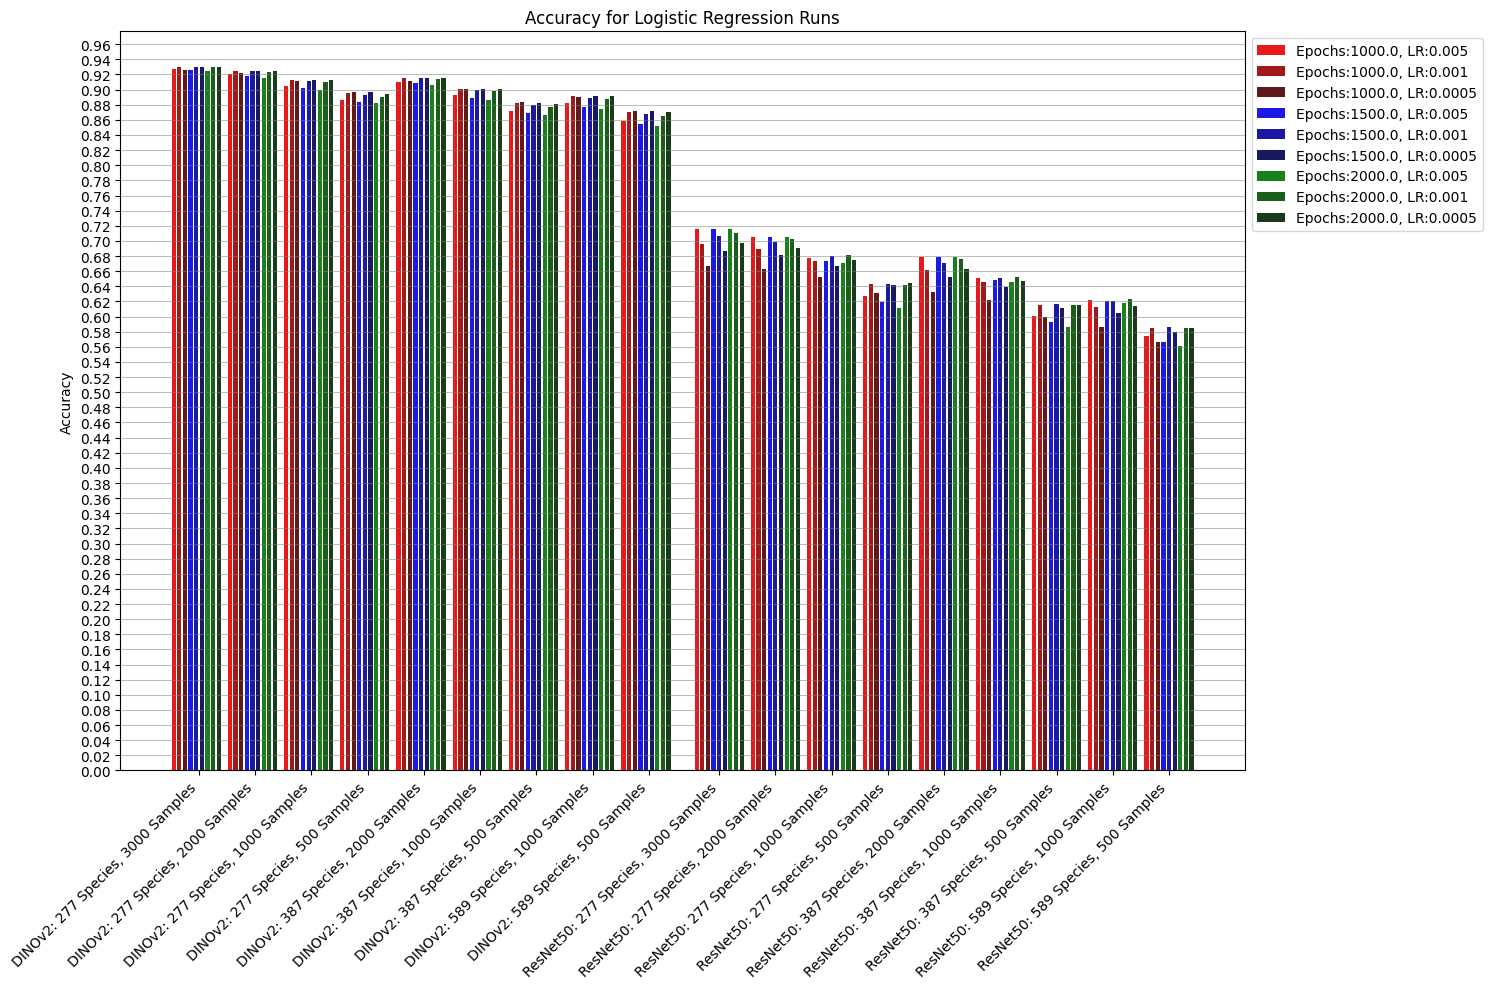

In [19]:

# Colors for foundational models
epoch_colors = {
    1000: 'red',
    1500: 'blue',
    2000: 'green',
}

lr_shades = {
    0.0005: 0.3,
    0.001: 0.6,
    0.005: 0.9
}

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))
bar_width = 0.3
index = np.arange(len(linear_df))

highest_training_duration = max(linear_df['Training Time (s)'])

added_labels = set()
baseoffset = 0
metric = 'Accuracy'

xtick_labels = []

# Draw bars
for i, row in linear_df.iterrows():

    

    label_text = f'Epochs:{row["Epochs"]}, LR:{row["Learning Rate"]}'
    
    # Add label only if it hasn't been added before
    label = label_text if label_text not in added_labels else None
    if label:
        added_labels.add(label_text)

    pos = i * 0.4

    ax.bar(
        baseoffset + pos, 
        row[metric],
        width=bar_width,
        label=label,
        color=adjust_color_brightness(epoch_colors[row['Epochs']], lr_shades[row['Learning Rate']]),
        alpha=0.9
    )
    i += 1        
    if i != 0 and i % 9 == 0:
        xtick_labels.append(f"{row['FoundationalModel']}: {row['SpeciesAmount']} Species, {row['SampleAmount']} Samples")
        baseoffset += 0.4
    if i != 0 and i % 81 == 0:
        baseoffset += 1.2
        

# X-axis labels
# xtick_labels = [f'Neighbors: {int(neighbors)}, Species: {int(species)}, Samples: {int(samples)}' for neighbors, species, samples in zip(knn_df['Neighbors'], knn_df['SpeciesAmount'], knn_df['SampleAmount'])]
# xtick_labels = ['DINOv2', 'ResNet50']

#ax.set_xlabel('Species-Samples')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Logistic Regression Runs')
dino_ticks = [1.8 + 4 * x for x in range(9)]
resnet_ticks = [38.8 + 4 * x for x in range(9)]
ax.set_xticks(dino_ticks + resnet_ticks)
#ax.set_xticks(range(2, 2 * (len(xtick_labels) + 1), 2))
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

# Legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', bbox_to_anchor=(1, 1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.grid(axis='y', which='major', linestyle='-', color='gray', alpha=0.5)

plt.tight_layout()
plt.show()


[1000. 1500. 2000.] [0.005  0.001  0.0005] [277 387 589]
Combinations:  9


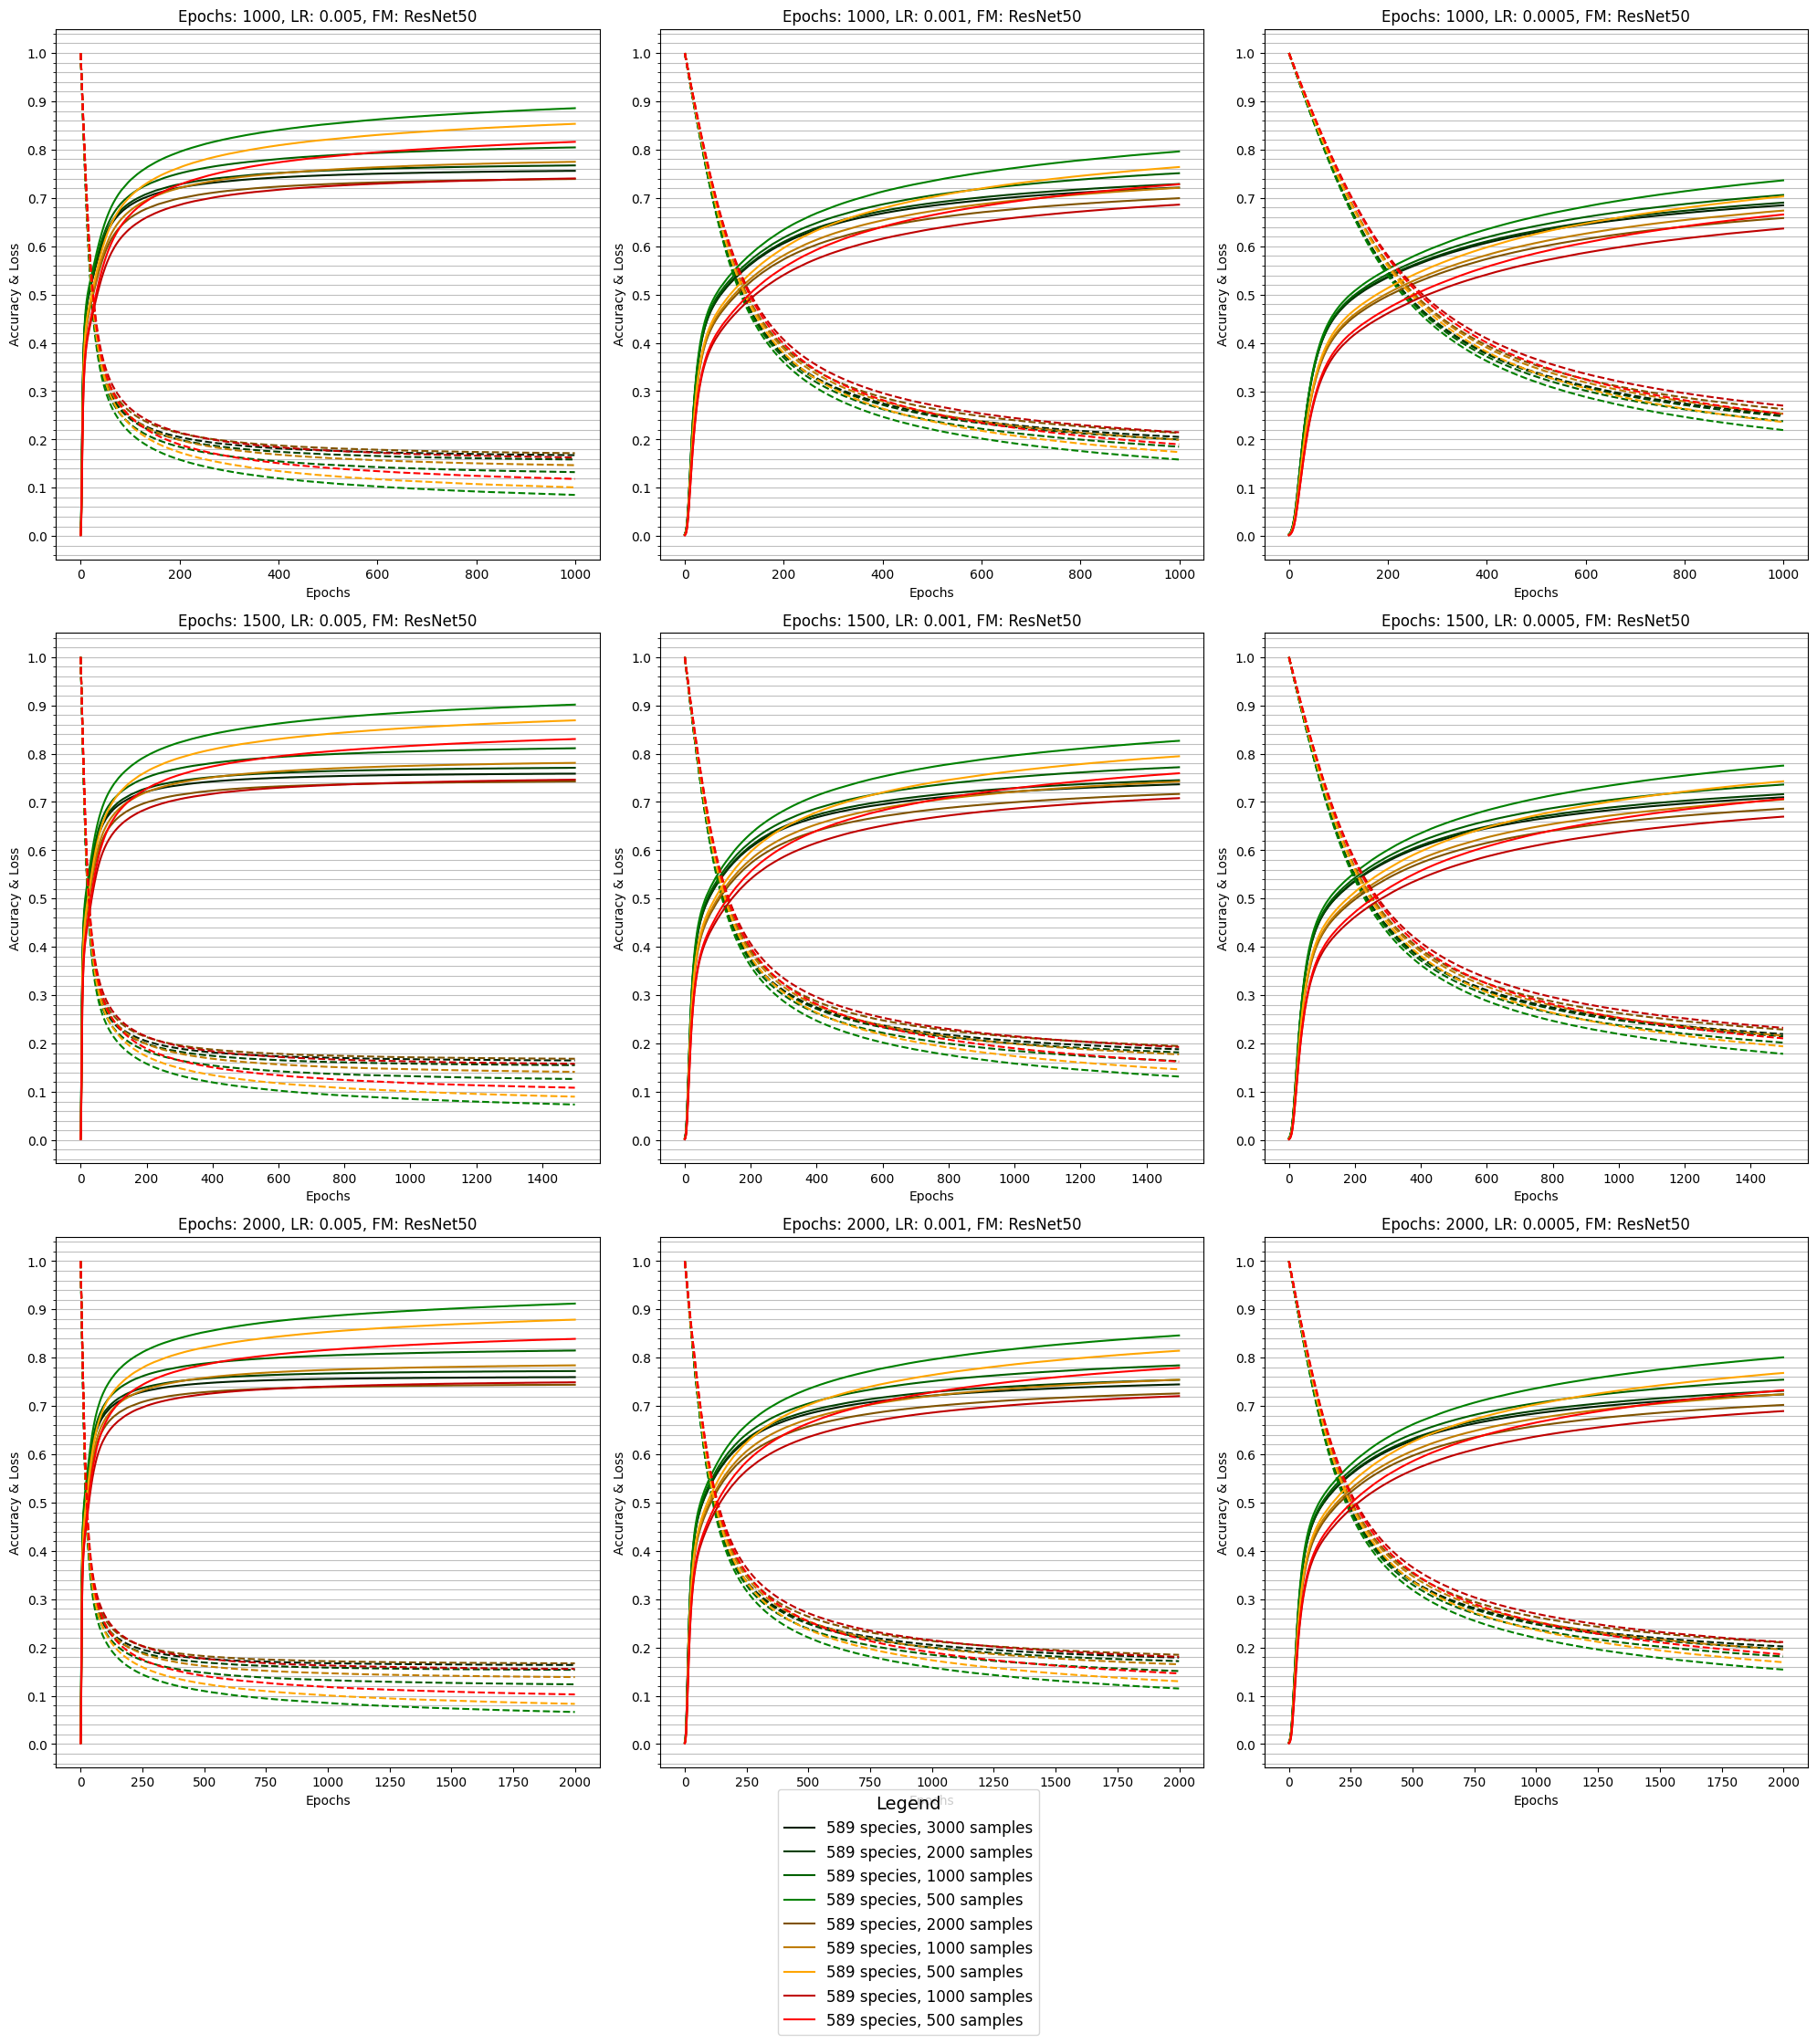

In [15]:
# Find unique epochs and learning rates
unique_epochs = linear_df['Epochs'].unique()
unique_learning_rates = linear_df['Learning Rate'].unique()
unique_species_amounts = linear_df['SpeciesAmount'].unique()
foundational_models = ['ResNet50']

print(unique_epochs, unique_learning_rates, unique_species_amounts)


fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.subplots_adjust(hspace=0.33, wspace=0.33)

# Colors for the lines
species_colors = {
    277: 'green',
    387: 'orange',
    589: 'red'
}

samplesize_shades = {
    500: 1.0,
    1000: 0.75,
    2000: 0.5,
    3000: 0.25
}


def generate_combinations(*args):
    return list(product(*args))

combinations = generate_combinations(unique_epochs, unique_learning_rates, foundational_models)

print('Combinations: ', len(combinations))
# Draw the line plots
for idx, (epoch, lr, fm) in enumerate(combinations):
    ax = axs[idx // 3, idx % 3]
    runs = linear_df[(linear_df['Epochs'] == epoch) & (linear_df['Learning Rate'] == lr) & (linear_df['FoundationalModel'] == fm)].reset_index()
    for i, run in runs.iterrows():            
        epoch_losses = eval(run['Epoch Losses'])  # Eval for list of losses
        epoch_losses_max = max(epoch_losses)
        epoch_losses = [loss / epoch_losses_max for loss in epoch_losses]
        epoch_accuracies = eval(run['Epoch Accuracies'])  # Eval for list of accuracies
        
        color = species_colors[run['SpeciesAmount']]
        shade = samplesize_shades[run['SampleAmount']]
        adjusted_color = adjust_color_brightness(color, shade)
        
        ax.plot(epoch_losses, linestyle='--', color=adjusted_color)
        ax.plot(epoch_accuracies, label=f'{species_amount} species, {run["SampleAmount"]} samples', linestyle='-', color=adjusted_color)
        ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
        ax.yaxis.set_minor_locator(plt.MultipleLocator(0.02))
        ax.grid(axis='y', which='both', linestyle='-', color='gray', alpha=0.5)
        ax.set_title(f'Epochs: {int(epoch)}, LR: {lr}, FM: {fm}')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Accuracy & Loss')

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.05), title="Legend", fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()

[1000. 1500. 2000.] [0.005  0.001  0.0005] [277 387 589]
Combinations:  9


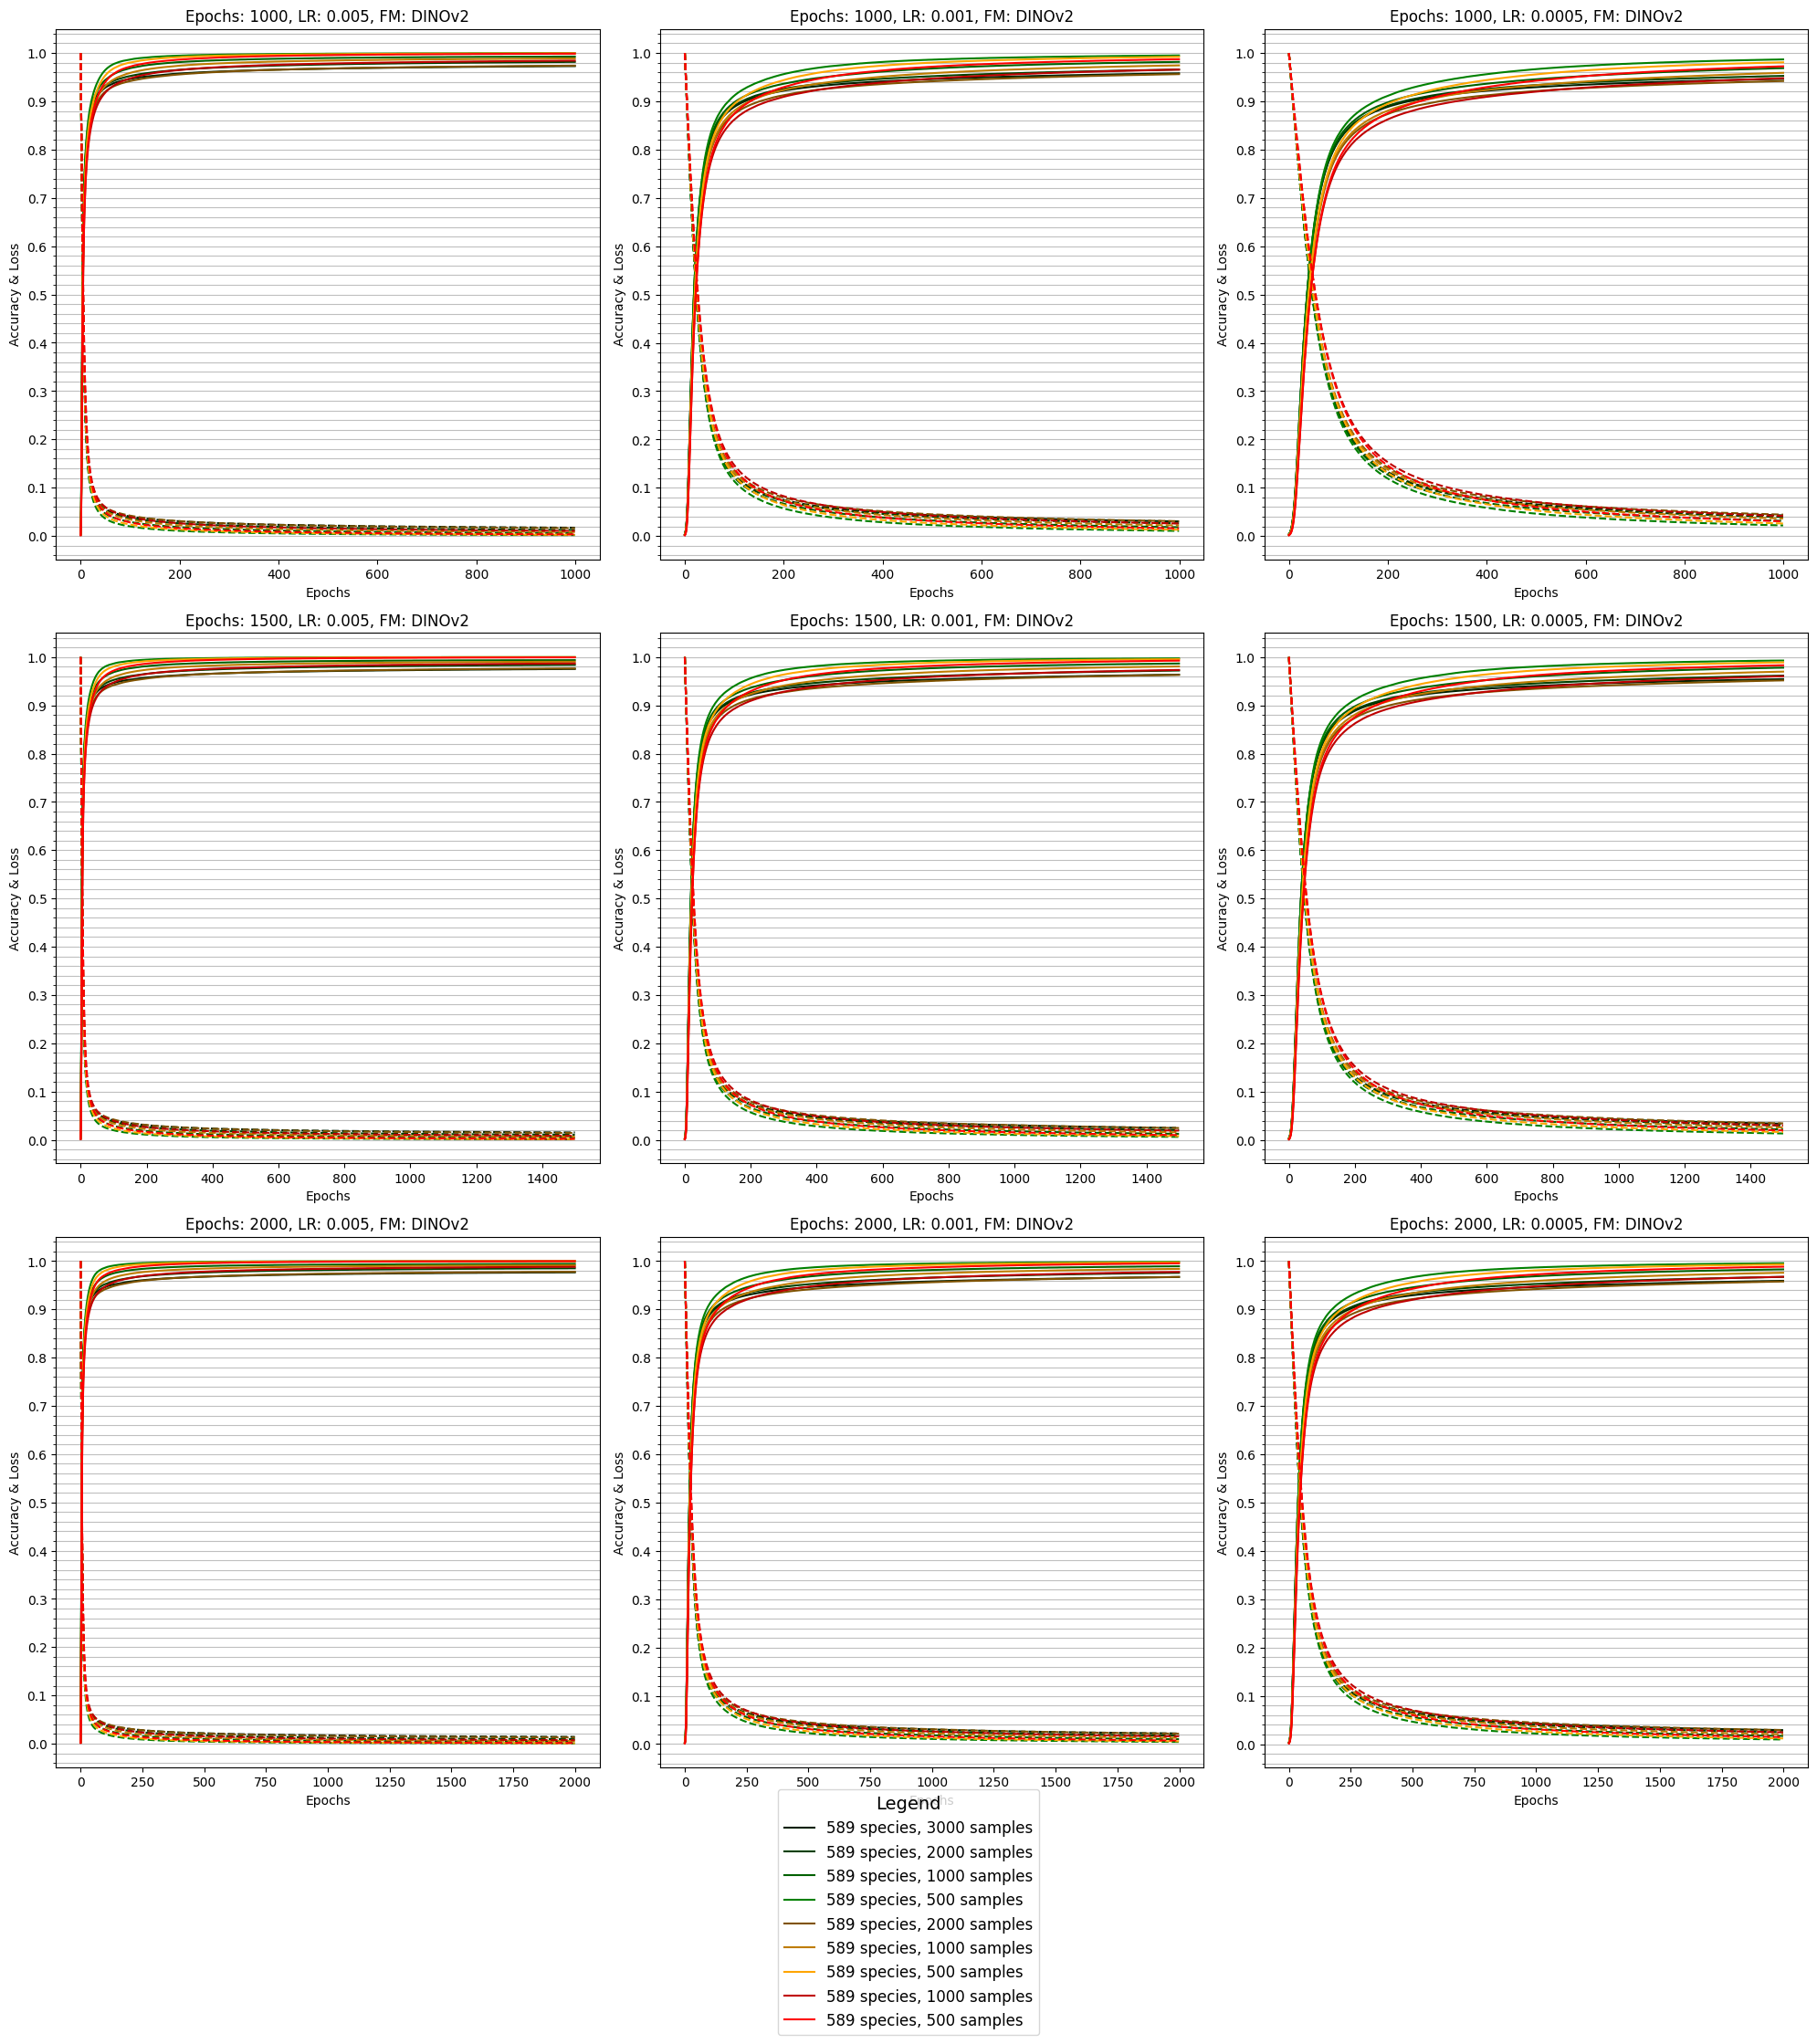

In [16]:
# Find unique epochs and learning rates
unique_epochs = linear_df['Epochs'].unique()
unique_learning_rates = linear_df['Learning Rate'].unique()
unique_species_amounts = linear_df['SpeciesAmount'].unique()
foundational_models = ['DINOv2']

print(unique_epochs, unique_learning_rates, unique_species_amounts)


fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.subplots_adjust(hspace=0.33, wspace=0.33)

# Colors for the lines
species_colors = {
    277: 'green',
    387: 'orange',
    589: 'red'
}

samplesize_shades = {
    500: 1.0,
    1000: 0.75,
    2000: 0.5,
    3000: 0.25
}


def generate_combinations(*args):
    return list(product(*args))

combinations = generate_combinations(unique_epochs, unique_learning_rates, foundational_models)

print('Combinations: ', len(combinations))
# Draw the line plots
for idx, (epoch, lr, fm) in enumerate(combinations):
    ax = axs[idx // 3, idx % 3]
    runs = linear_df[(linear_df['Epochs'] == epoch) & (linear_df['Learning Rate'] == lr) & (linear_df['FoundationalModel'] == fm)].reset_index()
    for i, run in runs.iterrows():            
        epoch_losses = eval(run['Epoch Losses'])  # Eval for list of losses
        epoch_losses_max = max(epoch_losses)
        epoch_losses = [loss / epoch_losses_max for loss in epoch_losses]
        epoch_accuracies = eval(run['Epoch Accuracies'])  # Eval for list of accuracies
        
        color = species_colors[run['SpeciesAmount']]
        shade = samplesize_shades[run['SampleAmount']]
        adjusted_color = adjust_color_brightness(color, shade)
        
        ax.plot(epoch_losses, linestyle='--', color=adjusted_color)
        ax.plot(epoch_accuracies, label=f'{species_amount} species, {run["SampleAmount"]} samples', linestyle='-', color=adjusted_color)
        ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
        ax.yaxis.set_minor_locator(plt.MultipleLocator(0.02))
        ax.grid(axis='y', which='both', linestyle='-', color='gray', alpha=0.5)
        ax.set_title(f'Epochs: {int(epoch)}, LR: {lr}, FM: {fm}')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Accuracy & Loss')

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.05), title="Legend", fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()